In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [7]:
# Load the dataset
df = pd.read_csv("Churn_Modelling.csv")

#Display first rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Explore the Dataset

# Dataset shape
print("Dataset Shape :",df.shape)

# Basic info
df.info()

# Check for missing values
df.isnull().sum()

Dataset Shape : (10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# Drop unnecessary Columns

# These columns do not help in prediction
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [21]:
#Encode Categorical Variables

#Label Encoding for Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
# Female:0,Male:1

# One-hot encoding for geography (France,Germany,Spain)
df = pd.get_dummies(df,columns=['Geography'],drop_first=True)

In [24]:
#Define features and targets

X = df.drop('Exited',axis=1) #Features
y = df['Exited'] # Target variable

In [30]:
# Train /Test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy Score: 0.866


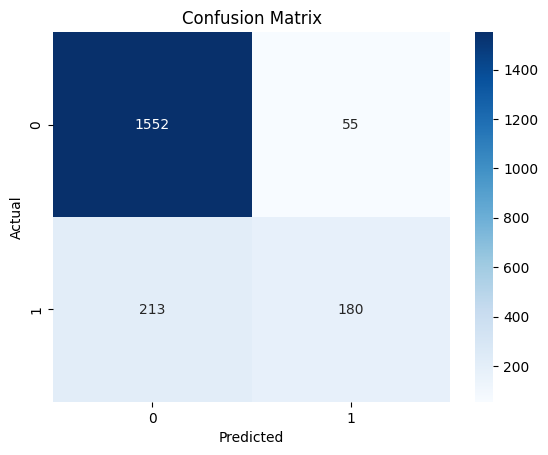

Classification_report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [37]:
# Evaluate the Model

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy Score:",accuracy_score(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Rport
print("Classification_report:\n",
classification_report(y_test,y_pred))

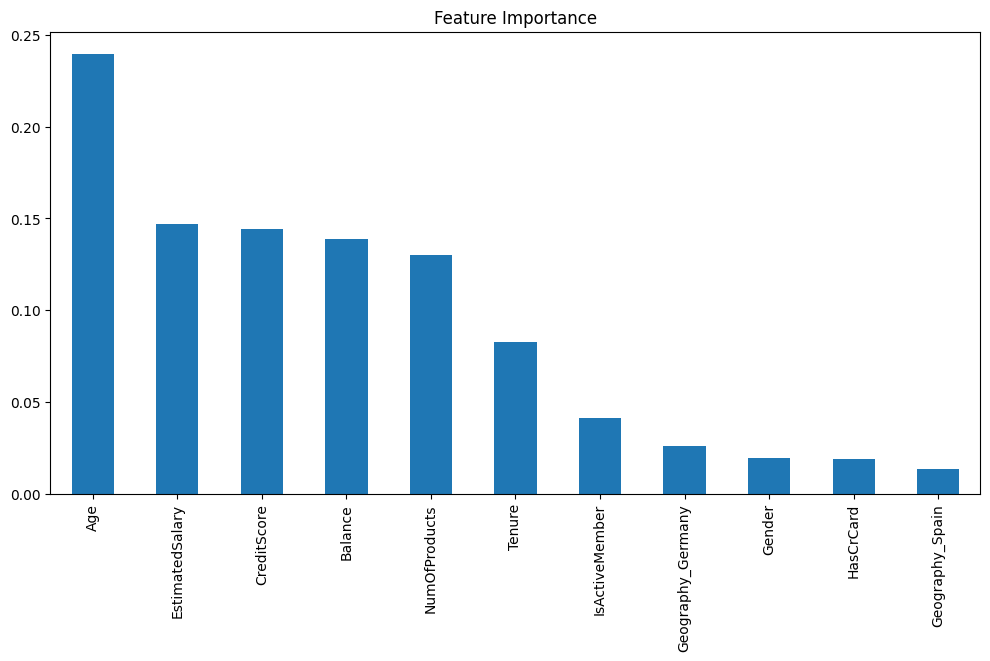

In [33]:
# Feature importance from Random Forest

importances = pd.Series(model.feature_importances_,index=X.columns)
importances.sort_values(ascending =False).plot(kind='bar',figsize=(12,6))
plt.title("Feature Importance")
plt.show()